# Run Visualization of Prediction

In [2]:
# Enable interactive plot
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks")

import importlib
from run import path_resolution

/home/yale1/miniconda3/envs/smart-cities/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
debug = False
dry_run = False
num_worker = 20
computease = False

# data = "RSO_LModule_Seq"
data = "RSO_LModule"

In [4]:
# path resolution
base_path = path_resolution()

 -- rsync --
Calling: rsync -av /share/temp/yhartmann/smart-cities-journal-based-on-jonahs-ma/data/ /home/yale1/ma-jonah-data/
sending incremental file list

sent 3,068 bytes  received 31 bytes  6,198.00 bytes/sec
total size is 20,528,940,833  speedup is 6,624,375.87
 -- rsync finished --

Base path: /home/yale1/ma-jonah-data/


## Create Datasets

In [5]:
sessions = [1, 2, 3, 4, 5, 6]

In [6]:
# construct data module
DLModule = getattr(importlib.import_module(f"datasets.{data}"), data)
data_module = DLModule(data_dir=base_path, 
    n_jobs=num_worker, 
    debug=debug,
    fix_nan=False,
    batch_size=1)

all_datasets = data_module._load_datasets(sessions=sessions)

QUEUEING TASKS | : 100%|██████████| 6/6 [00:00<00:00, 1798.33it/s]
PROCESSING TASKS | : 100%|██████████| 6/6 [01:25<00:00, 14.26s/it]
COLLECTING RESULTS | : 100%|██████████| 6/6 [00:00<00:00, 38538.78it/s]


# Visualize Conseq Nans

In [7]:
holes = pd.concat([d.optitrack_data.assign(session=session).reset_index()[['index', 'session']] for session, d in zip(sessions, all_datasets)])
holes['Consecutive Partial Frames'] = holes.groupby('session').diff()#.plot()
holes = holes.reset_index(drop=True)
holes

/tmp/ipykernel_2485469/2539427180.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  holes['Consecutive Partial Frames'] = holes.groupby('session').diff()#.plot()


,index,session,Consecutive Partial Frames
,,,
Frame,,,
0,0,1,NaN
1,1,1,1.0
2,2,1,1.0
3,3,1,1.0
4,4,1,1.0
...,...,...,...
128161,26694,6,1.0
128162,26695,6,1.0


<Axes: xlabel='Consecutive Partial Frames', ylabel='Count'>

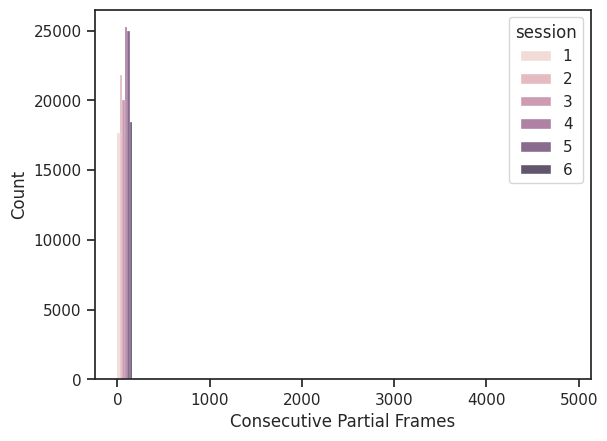

In [8]:
sns.histplot(data=holes, x="Consecutive Partial Frames", hue="session", multiple="dodge", bins=30)

                              Frame
index                                  48
session                                48
Consecutive Partial Frames             48
dtype: int64

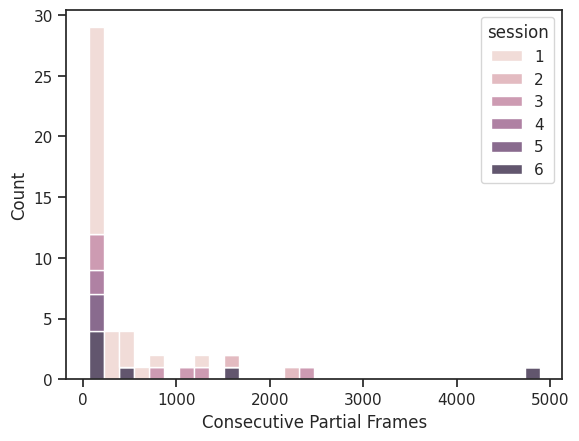

In [9]:
sns.histplot(data=holes[holes["Consecutive Partial Frames"] > 60], x="Consecutive Partial Frames", hue="session", multiple="stack", bins=30)
holes[holes["Consecutive Partial Frames"] > 60].count()

                              Frame
index                                  28
session                                28
Consecutive Partial Frames             28
dtype: int64

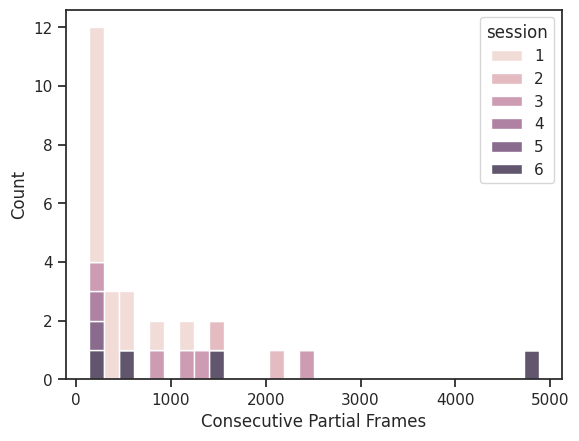

In [10]:
sns.histplot(data=holes[holes["Consecutive Partial Frames"] > 120], x="Consecutive Partial Frames", hue="session", multiple="stack", bins=30)
holes[holes["Consecutive Partial Frames"] > 120].count()

In [11]:
[(session, d.nan_percentage) for session, d in zip(sessions, all_datasets)]

[(1, 4.60264552246126),
 (2, 2.7553810183674234),
 (3, 2.64445241037878),
 (4, 0.27928327991996016),
 (5, 0.3868378812199037),
 (6, 7.046463392667655)]